In [1]:

%run ../../load_magic/storage.py
%run ../../load_magic/dataframes.py
%pprint
%who

DATA_FOLDER: ../data/
SAVES_FOLDER: ../saves/
Pretty printing has been turned OFF
DATA_CSV_FOLDER	 DATA_FOLDER	 ENCODING_TYPE	 SAVES_CSV_FOLDER	 SAVES_FOLDER	 SAVES_PICKLE_FOLDER	 attempt_to_pickle	 example_iterrows	 get_column_descriptions	 
load_csv	 load_dataframes	 load_object	 math	 os	 pd	 pickle	 save_dataframes	 store_objects	 
sys	 


In [2]:

# From https://www.heritage.org/index/ranking
file_name = r'../data/html/capitalism_by_country.html'
capitalism_df = pd.read_html(file_name)[0]
capitalism_df.columns = ['Rank', 'Country', 'Overall Capitalism', 'Change']
capitalism_df.sample(10).T

,72,35,87,16,109,34,82,18,88,149
Rank,54,NaN,91,12,133,21,59,13,62,153
Country,Bahrain,NaN,Saudi Arabia,United States,Solomon Islands,Lithuania,Kazakhstan,Netherlands,Portugal,Malawi
Overall Capitalism,66.4,NaN,60.7,76.8,54.6,74.2,65.4,76.8,65.3,51.4
Change,-1.3,NaN,1.1,1.1,-2.9,-1.1,-3.7,0.6,1.9,-0.6


In [3]:

# From https://en.wikipedia.org/wiki/List_of_countries_by_income_equality
file_name = r'../data/html/income_inequality_by_country.html'
income_inequality_df = pd.read_html(file_name)[0]
income_inequality_df.sample(10).T

,52,65,3,105,132,71,160,4,32,97
Country,Finland,Honduras,Angola,Micronesia,Rwanda,Iran,Trinidad and Tobago,Argentina,Comoros,Malawi
UN R/P 10%,5.6,59.4,NaN,NaN,18.6,17.2,12.9,31.6,NaN,10.9
UN R/P 20%,3.9,16.9,9,8.4,11,7.2,NaN,9.5,11.2,9.4
World Bank Gini %,26.8,50,42.7,40.1,50.4,38.8,40.3,42.4,45,46.1
World Bank Gini Year,2014,2016,2008,2013,2013,2014,1992,2016,2013,2010
CIA R/P 10%,5.7,35.2,NaN,NaN,18.2,16.9,NaN,35,NaN,11
CIA R/P Year,2000,2003,NaN,NaN,2000,1998,NaN,2007 Jan.-Mar.,NaN,2004
CIA Gini %,26.8,57.7,NaN,NaN,46.8,44.5,NaN,41.7,NaN,39
CIA Gini Year,2008,2007,NaN,NaN,2000,2006,NaN,2017,NaN,2004


In [4]:

capitalism_country_list = capitalism_df['Country'].tolist()
len(capitalism_country_list)

182

In [5]:

income_inequality_country_list = income_inequality_df['Country'].tolist()
len(income_inequality_country_list)

178

In [6]:

common_country_list = list(set.intersection(set(capitalism_country_list),
                                            set(income_inequality_country_list)))
len(common_country_list)

162

In [7]:

%run ../../load_magic/lists.py
typos_df = check_for_typos(capitalism_country_list, income_inequality_country_list)
mask_series = (typos_df['max_similarity'] < 1.0)
typos_df[mask_series].sort_values('max_similarity', ascending=False).head()

2.9156200885772705 Mon May 13 16:38:15 2019


,left_item,right_item,max_similarity
111,SÃ£o TomÃ© and PrÃ­ncipe,Sao Tome and Principe,0.800000
40,Saint Lucia,St. Lucia,0.800000
29,Macedonia,North Macedonia,0.750000
63,Kyrgyz Republic,Czech Republic,0.689655
49,Dominica,Romania,0.666667


In [8]:

mask_series = (capitalism_df['Country'] == 'SÃ£o TomÃ© and PrÃ\xadncipe')
idx = capitalism_df[mask_series].index.tolist()[0]
capitalism_df.loc[idx, 'Country'] = 'Sao Tome and Principe'

In [9]:

mask_series = (income_inequality_df['Country'] == 'St. Lucia')
idx = income_inequality_df[mask_series].index.tolist()[0]
income_inequality_df.loc[idx, 'Country'] = 'Saint Lucia'

In [10]:

mask_series = (income_inequality_df['Country'] == 'DR Congo')
idx = income_inequality_df[mask_series].index.tolist()[0]
income_inequality_df.loc[idx, 'Country'] = 'Democratic Republic of Congo'

In [11]:

mask_series = (income_inequality_df['Country'] == 'Congo, Republic of the')
idx = income_inequality_df[mask_series].index.tolist()[0]
income_inequality_df.loc[idx, 'Country'] = 'Republic of Congo'

In [12]:

mask_series = (income_inequality_df['Country'] == 'North Macedonia')
idx = income_inequality_df[mask_series].index.tolist()[0]
income_inequality_df.loc[idx, 'Country'] = 'Macedonia'

In [13]:

mask_series = (capitalism_df['Country'] == 'Kyrgyz Republic')
idx = capitalism_df[mask_series].index.tolist()[0]
capitalism_df.loc[idx, 'Country'] = 'Kyrgyzstan'

In [14]:

[cn for cn in capitalism_country_list if 'kyrg' in str(cn).lower()]

['Kyrgyz Republic']

In [15]:

[cn for cn in income_inequality_country_list if 'kyrg' in str(cn).lower()]

['Kyrgyzstan']

In [16]:

capitalism_country_list = capitalism_df['Country'].tolist()
income_inequality_country_list = income_inequality_df['Country'].tolist()
uncommon_country_list = list(set.symmetric_difference(set(capitalism_country_list),
                                                      set(income_inequality_country_list)))
sorted([str(cn) for cn in uncommon_country_list])

['Barbados', 'Brunei Darussalam', 'Burma', 'Dominica', 'Eritrea', 'European Union', 'Iraq', 'Kiribati', 'Libya', 'Myanmar', 'Palestine', 'Saint Vincent and the Grenadines', 'Samoa', 'Solomon Islands', 'Somalia', 'South Sudan', 'Syria', 'The Bahamas', 'Tonga', 'Vanuatu', 'World', 'Yemen', 'nan']

In [17]:

capitalism_country_list = capitalism_df['Country'].tolist()
income_inequality_country_list = income_inequality_df['Country'].tolist()
typos_df = check_for_typos(income_inequality_country_list, capitalism_country_list)
mask_series = (typos_df['max_similarity'] < 1.0)
typos_df[mask_series].sort_values('max_similarity', ascending=False).head()

2.9209868907928467 Mon May 13 16:38:18 2019


,left_item,right_item,max_similarity
72,Iraq,Iran,0.750000
153,Syria,Serbia,0.727273
142,Somalia,Romania,0.714286
91,Libya,Liberia,0.666667
144,South Sudan,South Korea,0.636364


In [18]:

merge_df = pd.merge(left=capitalism_df, right=income_inequality_df, how='inner', on=['Country'],
                    suffixes=('_capitalism', '_income_inequality'))
merge_df.sample(10).T

,120,125,126,141,49,147,133,52,7,29
Rank,144,115,147,155,44,158,151,75,22,33
Country,Egypt,Sri Lanka,Ukraine,Iran,Cyprus,Togo,Niger,Morocco,Malaysia,Macedonia
Overall Capitalism,52.5,56.4,52.3,51.1,68.1,50.3,51.6,62.9,74,71.1
Change,-0.9,-1.4,0.4,0.2,0.3,2.5,2.1,1,-0.5,-0.2
UN R/P 10%,8,11.1,5.9,17.2,NaN,NaN,46,11.7,22.1,12.5
UN R/P 20%,4.6,6.8,3.5,7.2,5.3,9.7,5.4,7.4,11.2,7.3
World Bank Gini %,31.8,39.8,25.5,38.8,35.6,43,34,40.7,46.3,35.6
World Bank Gini Year,2015,2016,2015,2014,2014,2015,2014,2007,2009,2015
CIA R/P 10%,8,36.1,7.6,16.9,NaN,NaN,44.3,11.9,28,12.3
CIA R/P Year,2000,2003/04 FY,2006,1998,NaN,NaN,1995,1999,2003 est.,2003


In [19]:

# Explanatory variable
xname = 'Overall Capitalism'

# Response variable
yname = 'World Bank Gini %'

# Remove NaNs
columns_list = ['Country', xname, yname]
df = merge_df[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

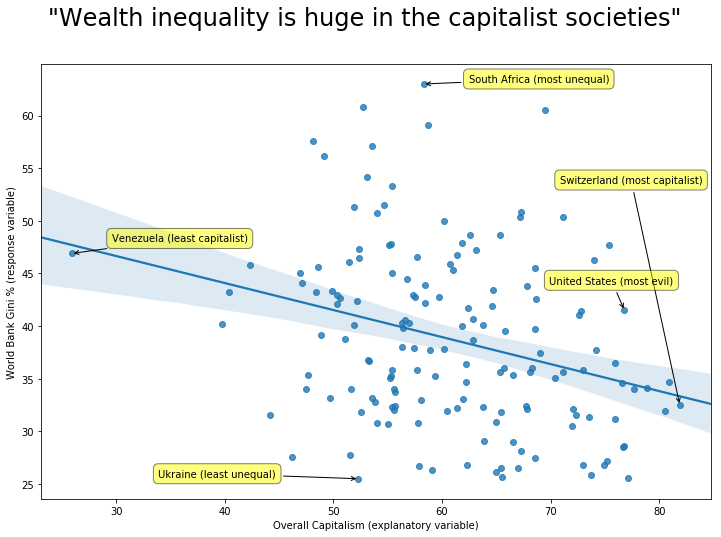

In [20]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'World Bank Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(40, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-120, 220), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(45, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-200, 0), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_obj = fig1_fig.suptitle('"Wealth inequality is huge in the capitalist societies"',
                              fontsize=24)

In [21]:

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from statsmodels.regression.quantile_regression import QuantReg

store_objects(capitalism_gini_df=merge_df)

Pickling to C:\Users\dev\Documents\repositories\notebooks\Miscellaneous\saves\pickle\capitalism_gini_df.pickle



# Least Absolute Deviation

The LAD model is a special case of quantile regression where q=0.5

In [22]:

merge_df.columns = ['capitalism_rank', 'country_name', 'freedom_score',
                    'freedom_change_from_2018', 'un_10_percent_ratio', 'un_20_percent_ratio',
                    'world_bank_gini_index', 'world_bank_gini year', 'cia_10_percent_ratio',
                    'cia_percent_ratio_year', 'cia_gini_percent', 'cia_gini_year']
explanatory_variable = 'freedom_score'
response_variable = 'world_bank_gini_index'
inequality_qr = smf.quantreg('{} ~ {}'.format(response_variable, explanatory_variable), merge_df)
inequality_rrw = inequality_qr.fit(q=.5)
print(inequality_rrw.summary())

                           QuantReg Regression Results                           
Dep. Variable:     world_bank_gini_index   Pseudo R-squared:              0.07546
Model:                          QuantReg   Bandwidth:                       7.707
Method:                    Least Squares   Sparsity:                        21.88
Date:                   Mon, 13 May 2019   No. Observations:                  154
Time:                           16:38:25   Df Residuals:                      152
                                           Df Model:                            1
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        53.6164      5.648      9.493      0.000      42.458      64.775
freedom_score    -0.2578      0.092     -2.813      0.006      -0.439      -0.077



# Visualizing the results

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.

# Prepare data for plotting

For convenience, we place the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary.

In [23]:

quantiles_ndarray = np.arange(.05, .96, .1)
def fit_model(q):
    rrw = inequality_qr.fit(q=q)
    row_dict = {}
    row_dict['quantile'] = q
    row_dict['intercept'] = rrw.params['Intercept']
    row_dict['slope'] = rrw.params[explanatory_variable]
    conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
    row_dict['lower_bound'] = conf_int_list[0]
    row_dict['upper_bound'] = conf_int_list[1]
    
    return row_dict
            
    
models_list = [fit_model(x) for x in quantiles_ndarray]

In [24]:

models_df = pd.DataFrame(models_list, columns=['quantile', 'intercept', 'slope', 'lower_bound',
                                               'upper_bound'])

rrw = smf.ols('{} ~ {}'.format(response_variable, explanatory_variable), merge_df).fit()
conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
ols_dict = dict(intercept=rrw.params['Intercept'], slope=rrw.params[explanatory_variable],
           lower_bound=conf_int_list[0], upper_bound=conf_int_list[1])

print(ols_dict)
models_df

{'intercept': 54.354020740713906, 'slope': -0.2566007888690859, 'lower_bound': -0.3890090690772592, 'upper_bound': -0.12419250866091255}


,quantile,intercept,slope,lower_bound,upper_bound
0,0.05,31.530727,-0.076922,-0.227313,0.073468
1,0.15,46.416669,-0.261905,-0.421475,-0.102334
2,0.25,45.536250,-0.212500,-0.376600,-0.048400
3,0.35,50.198520,-0.251852,-0.419147,-0.084557
4,0.45,53.993220,-0.273870,-0.449398,-0.098341
5,0.55,57.524091,-0.299270,-0.480919,-0.117622
6,0.65,57.140006,-0.268085,-0.437342,-0.098829
7,0.75,56.722787,-0.215190,-0.398164,-0.032216
8,0.85,71.726499,-0.393574,-0.638788,-0.148361
9,0.95,75.042856,-0.362637,-0.667915,-0.057360



# First plot

This plot compares best fit lines for 10 quantile regression models to the least squares fit. We see that:

1. Wealth inequality decreases with freedom
2. The least squares estimates fit low inequality observations slightly poorly (i.e. the OLS line passes over low freedom countries)

In [25]:

mask_series = (merge_df[explanatory_variable] == merge_df[explanatory_variable].min())
mask_series = mask_series | (merge_df[explanatory_variable] == merge_df[explanatory_variable].max())
merge_df[mask_series].T

,0,167
capitalism_rank,1,180
country_name,Hong Kong,North Korea
freedom_score,90.2,5.9
freedom_change_from_2018,0,0.1
un_10_percent_ratio,17.8,NaN
un_20_percent_ratio,NaN,NaN
world_bank_gini_index,NaN,NaN
world_bank_gini year,NaN,NaN
cia_10_percent_ratio,NaN,NaN
cia_percent_ratio_year,NaN,NaN


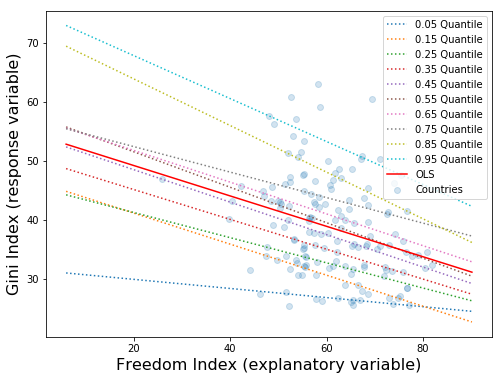

In [26]:

x = np.array([merge_df[explanatory_variable].min(), merge_df[explanatory_variable].max()])
get_y = lambda intercept, slope: intercept + slope * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models_df.shape[0]):
    y = get_y(models_df.loc[i, 'intercept'], models_df.loc[i, 'slope'])
    ax.plot(x, y, linestyle='dotted',
            label='{:.2} Quantile'.format(models_df.loc[i, 'quantile']))
    
y = get_y(ols_dict['intercept'], ols_dict['slope'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(merge_df[explanatory_variable], merge_df[response_variable], alpha=.2, label='Countries')
legend = ax.legend()
xlabel_text = ax.set_xlabel('Freedom Index (explanatory variable)', fontsize=16)
ylabel_text = ax.set_ylabel('Gini Index (response variable)', fontsize=16)


# Second plot

The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). The red lines represent OLS regression results along with their 95% confindence interval.

In only the low inequality observations do the quantile regression point estimates lie outside the OLS confidence interval, which suggests that the effect of freedom on inequality is mostly constant across the distribution.

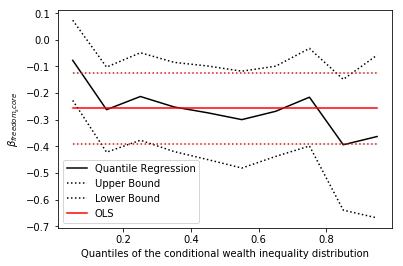

In [27]:

n = models_df.shape[0]
p1 = plt.plot(models_df['quantile'], models_df['slope'], color='black', label='Quantile Regression')
p2 = plt.plot(models_df['quantile'], models_df['upper_bound'], linestyle='dotted', color='black',
              label='Upper Bound')
p3 = plt.plot(models_df['quantile'], models_df['lower_bound'], linestyle='dotted', color='black',
              label='Lower Bound')

slope = ols_dict['slope']
p4 = plt.plot(models_df['quantile'], [slope] * n, color='red', label='OLS')

lower_bound = ols_dict['lower_bound']
p5 = plt.plot(models_df['quantile'], [lower_bound] * n, linestyle='dotted', color='red')

upper_bound = ols_dict['upper_bound']
p6 = plt.plot(models_df['quantile'], [upper_bound] * n, linestyle='dotted', color='red')

plt.ylabel(r'$\beta_{{{}}}$'.format(explanatory_variable))
plt.xlabel('Quantiles of the conditional wealth inequality distribution')
legend_obj = plt.legend(loc='lower left')

In [30]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "notebook_path = " + "'"+attribs['data-notebook-path'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [31]:
# %load ../../load_magic/nbviewer.py

from IPython.display import HTML

notebook_viewer_url = 'https://nbviewer.jupyter.org/github/dbabbitt/notebooks/blob/master/'
notebook_viewer_url += '/'.join(notebook_path.split('/')[1:])
html_str = 'Click <a href="{}" target="_blank">here</a> to view notebook in nbviewer.'
HTML(html_str.format(notebook_viewer_url))